In [1]:
import matplotlib.pyplot as plt
import numpy as np
from rubin_sim.maf.runComparison import archive
import pandas as pd
from matplotlib.pyplot import cm

In [2]:
# ! pwd
# ! ls
# ! rm -r

In [3]:
pd.set_option('display.max_rows', None)
families = archive.get_family_descriptions()
fam = ['baseline', 'rolling', 'triplets', 'long gaps no pairs',
       'bluer balance', 'longer u visits', 'vary nes', 'vary gp',
       'galactic plane footprint', 'vary expt', 'good seeing',
       'microsurveys', 'twilight neo 15s', 'technical',
       'suppress repeats', 'ddf percent', 'ddf euclid moved',
       'ddf season length', 'ddf double', 'ddf quad',
       'ddf quad subfilter', 'ddf bright', 'ddf dither', 'ddf roll',
       'ddf accordian', 'ddf old rot', 'ddf deep universal',
       'ddf deep rolling', 'ddf early deep'] # Write here the families of the cadences you want to select
# family_list = families.index.values # Use this to show all available families
menuP1 =  families.explode('run').loc[fam, 'run']
menuP2 =  families.explode('filepath').loc[fam, 'filepath']
menu = pd.concat([menuP1,menuP2], axis=1, keys=['run','filepath'])
row_num = np.arange(len(menu))
menu['option'] = row_num.tolist()
# menu

In [4]:
len(menu)

308

In [5]:
len(fam)

29

In [6]:
# menu['run'][0:4]
# menu.index[0:4].values

In [7]:
refcadence = pd.read_csv('baseline_baseline_v2.1_10yrs/efficiency_baseline_baseline_v2.1_10yrs.csv')
refcadence

dist_min_Mpc   dist_max_Mpc                              metric   found  \
0            10           1400     KNePopMetric__blue_color_detect     284   
1            10           1400    KNePopMetric__multi_color_detect    3084   
2            10           1400          KNePopMetric__multi_detect    3727   
3            10           1400      KNePopMetric__red_color_detect     206   
4            10           1400        KNePopMetric__ztfrest_simple     294   
5            10           1400   KNePopMetric__ztfrest_simple_blue     217   
6            10           1400    KNePopMetric__ztfrest_simple_red     107   

    total   efficiency  
0  500000     0.000568  
1  500000     0.006168  
2  500000     0.007454  
3  500000     0.000412  
4  500000     0.000588  
5  500000     0.000434  
6  500000     0.000214

In [8]:
first = 0
last = 308

In [9]:
fam_detail = [None]*len(menu)

for item, (cadence, family, option) in enumerate(zip(menu['run'][first:last],menu.index[first:last].values,menu['option'][first:last])):    
    if 'baseline_v2.1_10yrs' in cadence or 'baseline_v2.0_10yrs' in cadence or 'baseline_retrofoot_v2.0_10yrs' in cadence or 'retro_baseline_v2.0_10yrs' in cadence:
        fam_detail[option] = 'baseline'
    if 'rolling_ns' in cadence:
        fam_detail[option] = 'rolling_ns'
    if 'rolling_bulge' in cadence or 'rolling_all_sky' in cadence:
        fam_detail[option] = 'rolling_bulge/allsky'
    if 'noroll_v2.0_10yrs' in cadence or 'roll_early_v2.0_10yrs' in cadence:
        fam_detail[option] = 'no/early roll'
    if 'presto_gap' in cadence:
        fam_detail[option] = 'presto_gap'
    if 'presto_half_gap' in cadence:
        fam_detail[option] = 'presto_half_gap'
    if 'long_gaps_nightsoff' in cadence:
        fam_detail[option] = 'long_gaps_nightsoff'
    if 'long_gaps_np_nightsoff' in cadence and 'delayed1827' in cadence:
        fam_detail[option] = 'long_gaps_np_nightsoff-del1827'
    if 'long_gaps_np_nightsoff' in cadence and 'delayed-1' in cadence:
        fam_detail[option] = 'long_gaps_np_nightsoff-del1'    
    if family == 'bluer balance':
        fam_detail[option] = 'bluer balance'
    if family == 'longer u visits':
        fam_detail[option] = 'longer u visits'
    if family == 'vary nes':
        fam_detail[option] = 'vary nes'
    if family == 'vary gp':
        fam_detail[option] = 'vary gp'
    if 'plane_priority' in cadence:
        fam_detail[option] = 'plane_priority'
    if 'pencil' in cadence:
        fam_detail[option] = 'pencil'
    if family == 'vary expt':
        fam_detail[option] = 'vary expt'
    if 'good_seeing_gsw' in cadence:
        fam_detail[option] = 'good_seeing'
    if 'good_seeing_u_gsw' in cadence:
        fam_detail[option] = 'good_seeing_u'
    if 'good_seeing_u_gsw' in cadence:
        fam_detail[option] = 'good_seeing_u'
    if 'virgo_cluster_v2.0_10yrs' in cadence or 'carina_v2.0_10yrs' in cadence or 'smc_movie_v2.0_10yrs' in cadence or 'roman_v2.0_10yrs' in cadence or 'north_stripe_v2.0_10yrs' in cadence:
        fam_detail[option] = 'clusters/galaxies/others'
    if 'local_gal_bindx' in cadence:
        fam_detail[option] = 'local_gal_bindx'
    if 'too_rate' in cadence:
        fam_detail[option] = 'too_rate'
    if 'short_exp_v2.0_10yrs' in cadence or 'multi_short_v2.0_10yrs' in cadence:
        fam_detail[option] = 'shorts'
    if 'twilight_neo_nightpattern' in cadence:
        fam_detail[option] = 'twilight_neo_nightpattern'
    if family == 'twilight neo 15s':
        fam_detail[option] = 'twilight neo 15s'
    if family == 'technical' or family == 'suppress repeats' or family == 'ddf percent' or family == 'ddf euclid moved' or family == 'ddf season length' or family == 'ddf double' or family == 'ddf quad' or family == 'ddf quad subfilter' or family == 'ddf bright' or family == 'ddf dither' or family == 'ddf roll' or family == 'ddf accordian' or family == 'ddf old rot' or family == 'ddf deep universal' or family == 'ddf deep rolling' or family == 'ddf early deep':
        fam_detail[option] = family       
# fam_detail

In [10]:
len(set(fam_detail))

40

In [11]:
result = menu.copy()
result.drop('filepath', inplace=True, axis=1)
result.insert(1, 'subfamily', fam_detail)
result['ztfrest_simple'] = [None]*len(menu)
result['multi_detect'] = [None]*len(menu)
result['blue_color_detect'] = [None]*len(menu)
result['multi_color_detect'] = [None]*len(menu)
result['red_color_detect'] = [None]*len(menu)
result['ztfrest_simple_blue'] = [None]*len(menu)
result['ztfrest_simple_red'] = [None]*len(menu)
# result

In [12]:
# result

In [13]:
# metric0 = ' KNePopMetric__ztfrest_simple'
# metric1 = ' KNePopMetric__multi_detect'
# metric2 = ' KNePopMetric__blue_color_detect'
# metric3 = ' KNePopMetric__multi_color_detect'
# metric4 = ' KNePopMetric__red_color_detect'
# metric5 = ' KNePopMetric__ztfrest_simple_blue'
# metric6 = ' KNePopMetric__ztfrest_simple_red'

for item, (family, subfamily, cadence, option) in enumerate(zip(menu.index[first:last].values,result['subfamily'][first:last],menu['run'][first:last],menu['option'][first:last])):    
    if option < 164 or option > 206:
#         print(item)
        pdtemp = pd.read_csv(f'{family}_{cadence}/efficiency_{family}_{cadence}.csv')
        result.iloc[option, result.columns.get_loc('ztfrest_simple')] =  pdtemp[pdtemp[' metric']==' KNePopMetric__ztfrest_simple'][' efficiency'] #/ refcadence[refcadence[' metric']==' KNePopMetric__ztfrest_simple'][' efficiency']
        result.iloc[option, result.columns.get_loc('multi_detect')] =  pdtemp[pdtemp[' metric']==' KNePopMetric__multi_detect'][' efficiency'] #/ refcadence[refcadence[' metric']==' KNePopMetric__multi_detect'][' efficiency']
        result.iloc[option, result.columns.get_loc('blue_color_detect')] =  pdtemp[pdtemp[' metric']==' KNePopMetric__blue_color_detect'][' efficiency'] #/ refcadence[refcadence[' metric']==' KNePopMetric__blue_color_detect'][' efficiency']
        result.iloc[option, result.columns.get_loc('multi_color_detect')] =  pdtemp[pdtemp[' metric']==' KNePopMetric__multi_color_detect'][' efficiency'] #/ refcadence[refcadence[' metric']==' KNePopMetric__multi_color_detect'][' efficiency']
        result.iloc[option, result.columns.get_loc('red_color_detect')] =  pdtemp[pdtemp[' metric']==' KNePopMetric__red_color_detect'][' efficiency'] #/ refcadence[refcadence[' metric']==' KNePopMetric__red_color_detect'][' efficiency']
        result.iloc[option, result.columns.get_loc('ztfrest_simple_blue')] =  pdtemp[pdtemp[' metric']==' KNePopMetric__ztfrest_simple_blue'][' efficiency'] #/ refcadence[refcadence[' metric']==' KNePopMetric__ztfrest_simple_blue'][' efficiency']
        result.iloc[option, result.columns.get_loc('ztfrest_simple_red')] =  pdtemp[pdtemp[' metric']==' KNePopMetric__ztfrest_simple_red'][' efficiency'] #/ refcadence[refcadence[' metric']==' KNePopMetric__ztfrest_simple_red'][' efficiency']

In [14]:
len(result)
# result

308

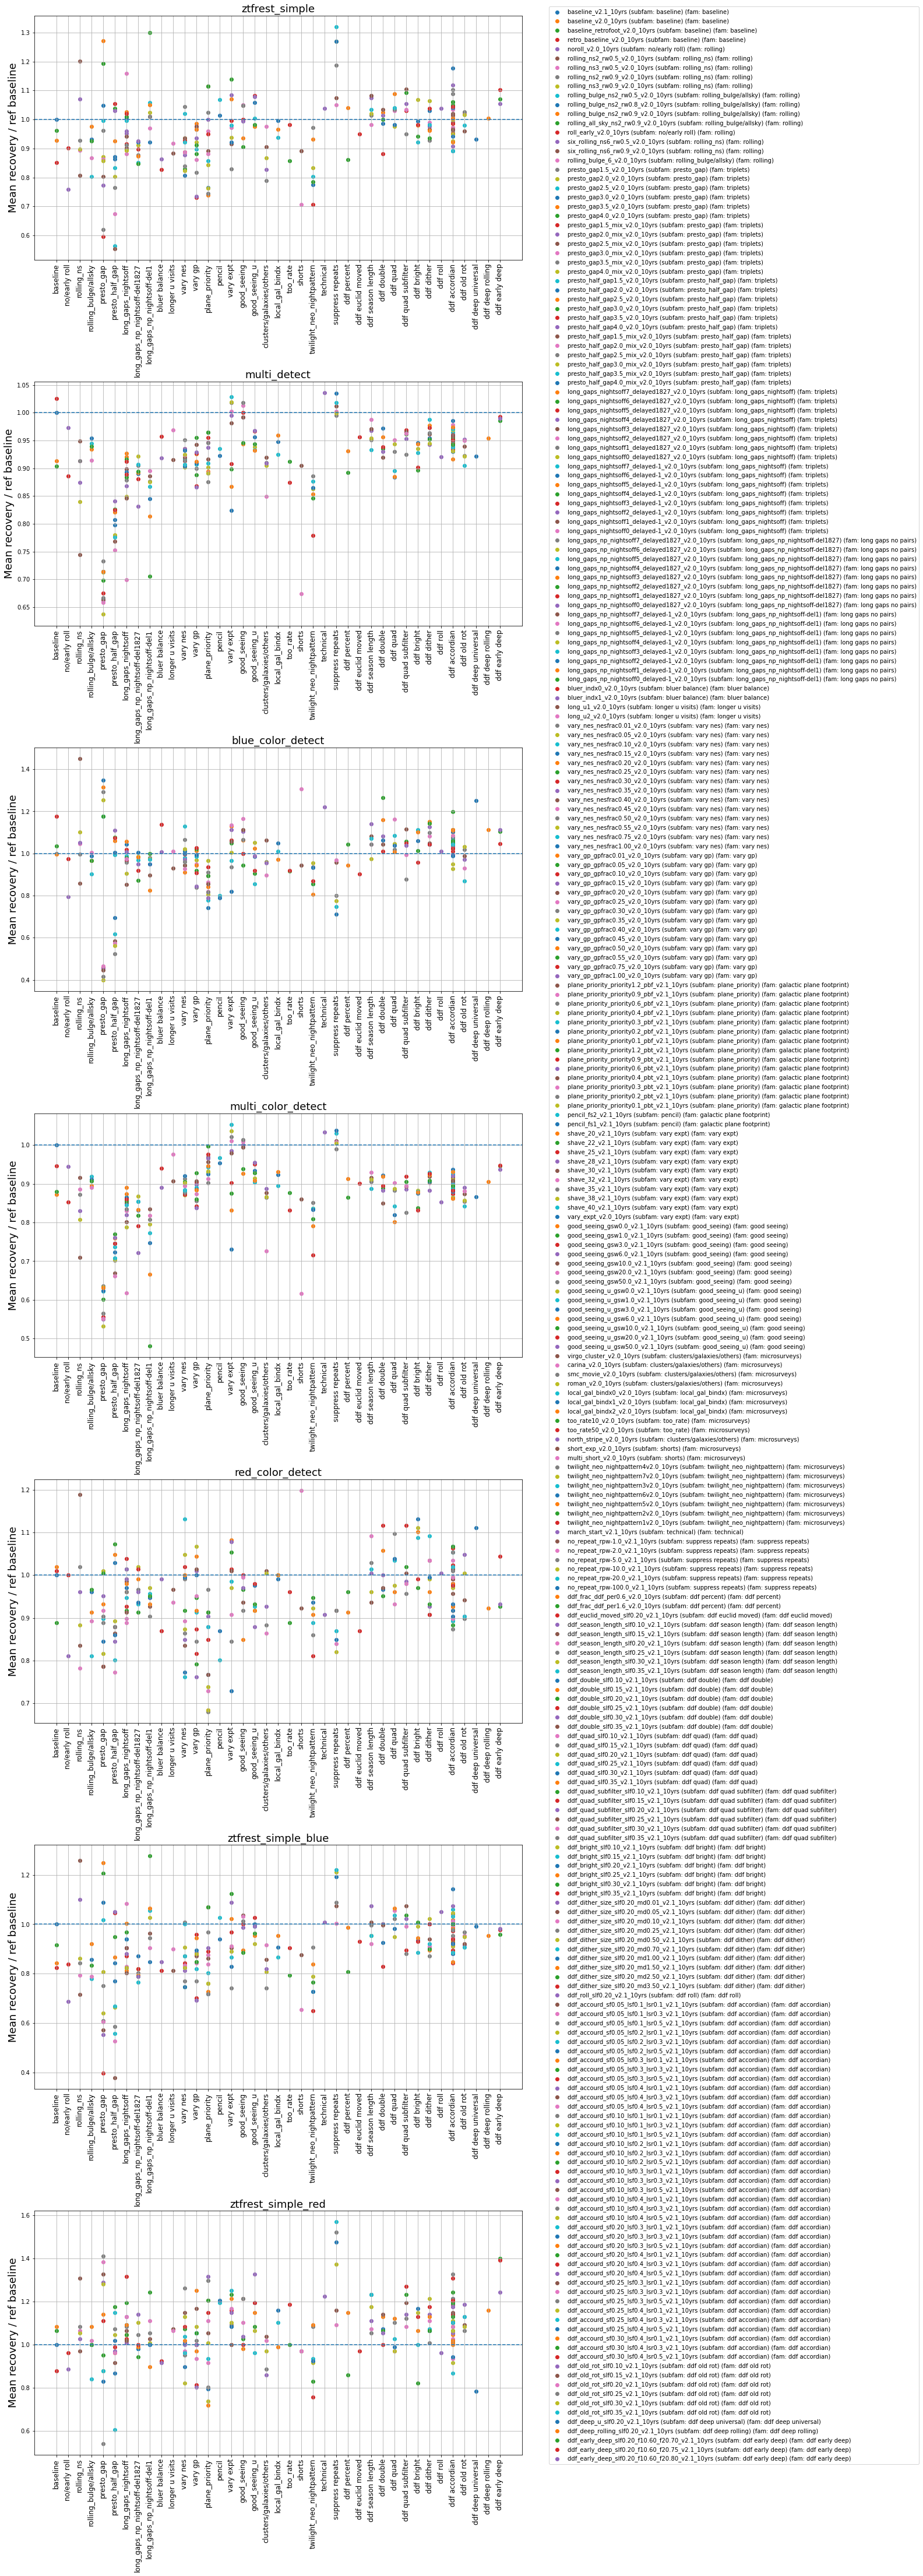

In [15]:
legends = [None] * last

fig, axes = plt.subplots(7,1, figsize=(15,11*7))

# countfamily1 = 'baseline'
# countfamily2 = 0

model_colors = cm.Spectral(np.linspace(0, 1, len(result)))#[::-1]
np.take(model_colors,np.random.permutation(model_colors.shape[0]),axis=0,out=model_colors);

for item, (family, subfamily, cadence, option, metric0, metric1, metric2, metric3, metric4, metric5, metric6) in enumerate(zip(result.index[first:last].values,result['subfamily'][first:last],result['run'][first:last],result['option'][first:last],
                                                                                                                              result['ztfrest_simple'][first:last],
                                                                                                                              result['multi_detect'][first:last],
                                                                                                                              result['blue_color_detect'][first:last],
                                                                                                                              result['multi_color_detect'][first:last],
                                                                                                                              result['red_color_detect'][first:last],
                                                                                                                              result['ztfrest_simple_blue'][first:last],
                                                                                                                              result['ztfrest_simple_red'][first:last])):    
    if option < 164 or option > 206:
        legends[option] = cadence
        axes[0].scatter(subfamily,metric0 / refcadence[refcadence[' metric']==' KNePopMetric__ztfrest_simple'][' efficiency'], label=f'{cadence} (subfam: {subfamily}) (fam: {family})')#, color=model_colors[item])
        axes[1].scatter(subfamily,metric1 / refcadence[refcadence[' metric']==' KNePopMetric__multi_detect'][' efficiency'])#, color=model_colors[item])
        axes[2].scatter(subfamily,metric2 / refcadence[refcadence[' metric']==' KNePopMetric__blue_color_detect'][' efficiency'])#, color=model_colors[item])
        axes[3].scatter(subfamily,metric3 / refcadence[refcadence[' metric']==' KNePopMetric__multi_color_detect'][' efficiency'])#, color=model_colors[item])
        axes[4].scatter(subfamily,metric4 / refcadence[refcadence[' metric']==' KNePopMetric__red_color_detect'][' efficiency'])#, color=model_colors[item])
        axes[5].scatter(subfamily,metric5 / refcadence[refcadence[' metric']==' KNePopMetric__ztfrest_simple_blue'][' efficiency'])#, color=model_colors[item])
        axes[6].scatter(subfamily,metric6 / refcadence[refcadence[' metric']==' KNePopMetric__ztfrest_simple_red'][' efficiency'])#, color=model_colors[item])

axes[0].set_title(f'ztfrest_simple', fontsize=18)
axes[0].set_ylabel('Mean recovery / ref baseline', fontsize=18)
axes[0].axhline(y=1, linestyle = '--')
axes[0].grid()
axes[1].set_title(f'multi_detect', fontsize=18)
axes[1].set_ylabel('Mean recovery / ref baseline', fontsize=18)
axes[1].axhline(y=1, linestyle = '--')
axes[1].grid()
axes[2].set_title(f'blue_color_detect', fontsize=18)
axes[2].set_ylabel('Mean recovery / ref baseline', fontsize=18)
axes[2].axhline(y=1, linestyle = '--')
axes[2].grid()
axes[3].set_title(f'multi_color_detect', fontsize=18)
axes[3].set_ylabel('Mean recovery / ref baseline', fontsize=18)
axes[3].axhline(y=1, linestyle = '--')
axes[3].grid()
axes[4].set_title(f'red_color_detect', fontsize=18)
axes[4].set_ylabel('Mean recovery / ref baseline', fontsize=18)
axes[4].axhline(y=1, linestyle = '--')
axes[4].grid()
axes[5].set_title(f'ztfrest_simple_blue', fontsize=18)
axes[5].set_ylabel('Mean recovery / ref baseline', fontsize=18)
axes[5].axhline(y=1, linestyle = '--')
axes[5].grid()
axes[6].set_title(f'ztfrest_simple_red', fontsize=18)
axes[6].set_ylabel('Mean recovery / ref baseline', fontsize=18)
axes[6].axhline(y=1, linestyle = '--')
axes[6].grid()


axes[0].legend(bbox_to_anchor=(1.05, 1.05))

for tick in axes[0].get_xticklabels():
    tick.set_rotation(90)
    tick.set_fontsize(12)
for tick in axes[1].get_xticklabels():
    tick.set_rotation(90)
    tick.set_fontsize(12)
for tick in axes[2].get_xticklabels():
    tick.set_rotation(90)
    tick.set_fontsize(12)
for tick in axes[3].get_xticklabels():
    tick.set_rotation(90)
    tick.set_fontsize(12)    
for tick in axes[4].get_xticklabels():
    tick.set_rotation(90)
    tick.set_fontsize(12)
for tick in axes[5].get_xticklabels():
    tick.set_rotation(90)
    tick.set_fontsize(12)
for tick in axes[6].get_xticklabels():
    tick.set_rotation(90)
    tick.set_fontsize(12)
fig.subplots_adjust(hspace=0.5)
plt.show()
#axes[0].legend([legends], bbox_to_anchor=(1.05, 1.05))

In [16]:
BestCadences = pd.DataFrame(columns=['ztfrest_simple', 'ztfrest_simple-run', 'multi_detect', 'multi_detect-run', 'blue_color_detect', 'blue_color_detect-run', 'multi_color_detect', 'multi_color_detect-run', 'red_color_detect', 'red_color_detect-run', 'ztfrest_simple_blue', 'ztfrest_simple_blue-run', 'ztfrest_simple_red', 'ztfrest_simple_red-run'])
BestCadences.insert(0, 'subfamily', result['subfamily'].drop_duplicates())

for item, subfamily in enumerate(BestCadences['subfamily'][:]):
#     print(subfamily)
    for metric in ['ztfrest_simple', 'multi_detect', 'blue_color_detect', 'multi_color_detect','red_color_detect', 'ztfrest_simple_blue', 'ztfrest_simple_red']:
        
#         print(metric)
        bestvalue = result[result['subfamily']==result['subfamily'].drop_duplicates()[item]][metric].max()
        BestCadences.iloc[item, BestCadences.columns.get_loc(metric)] = bestvalue
        bestrun = result[result['subfamily']==result['subfamily'].drop_duplicates()[item]][ result[result['subfamily']==result['subfamily'].drop_duplicates()[item]][metric] == bestvalue ]['run']
        if len(bestrun) > 1:
            print(item)
            print(subfamily)
            print(metric)
            print(bestrun)
        BestCadences.iloc[item, BestCadences.columns.get_loc(f'{metric}-run')] = bestrun.any()
#         print(f'{metric}-run')
#         print(bestrun.values)
BestCadences

13
plane_priority
ztfrest_simple
family
galactic plane footprint    plane_priority_priority1.2_pbf_v2.1_10yrs
galactic plane footprint    plane_priority_priority1.2_pbt_v2.1_10yrs
Name: run, dtype: object
13
plane_priority
multi_detect
family
galactic plane footprint    plane_priority_priority1.2_pbf_v2.1_10yrs
galactic plane footprint    plane_priority_priority1.2_pbt_v2.1_10yrs
Name: run, dtype: object
13
plane_priority
multi_color_detect
family
galactic plane footprint    plane_priority_priority1.2_pbf_v2.1_10yrs
galactic plane footprint    plane_priority_priority1.2_pbt_v2.1_10yrs
Name: run, dtype: object
13
plane_priority
ztfrest_simple_blue
family
galactic plane footprint    plane_priority_priority1.2_pbf_v2.1_10yrs
galactic plane footprint    plane_priority_priority1.2_pbt_v2.1_10yrs
Name: run, dtype: object
16
good_seeing
ztfrest_simple_red
family
good seeing    good_seeing_gsw10.0_v2.1_10yrs
good seeing    good_seeing_gsw50.0_v2.1_10yrs
Name: run, dtype: object
19
local_gal_bi

subfamily ztfrest_simple  \
family                                                                    
baseline                                        baseline       0.000588   
rolling                                    no/early roll        0.00053   
rolling                                       rolling_ns       0.000706   
rolling                             rolling_bulge/allsky       0.000574   
triplets                                      presto_gap       0.000748   
triplets                                 presto_half_gap        0.00062   
triplets                             long_gaps_nightsoff       0.000682   
long gaps no pairs        long_gaps_np_nightsoff-del1827       0.000544   
long gaps no pairs           long_gaps_np_nightsoff-del1       0.000764   
bluer balance                              bluer balance       0.000508   
longer u visits                          longer u visits        0.00054   
vary nes                                        vary nes       0.000614   
vary gp                                          vary gp        0.00058   
galactic plane footprint                  plane_priority       0.000656   
galactic plane footprint                          pencil       0.000628   
vary expt                                      vary expt        0.00067   
good seeing                                  good_seeing       0.000618   
good seeing                                good_seeing_u       0.000636   
microsurveys                    clusters/galaxies/others       0.000574   
microsurveys                             local_gal_bindx       0.000586   
microsurveys                                    too_rate       0.000578   
microsurveys                                      shorts       0.000524   
microsurveys                   twilight_neo_nightpattern       0.000572   
twilight neo 15s                        twilight neo 15s            NaN   
technical                                      technical        0.00061   
suppress repeats                        suppress repeats       0.000776   
ddf percent                                  ddf percent       0.000612   
ddf euclid moved                        ddf euclid moved       0.000558   
ddf season length                      ddf season length       0.000636   
ddf double                                    ddf double       0.000608   
ddf quad                                        ddf quad        0.00064   
ddf quad subfilter                    ddf quad subfilter        0.00065   
ddf bright                                    ddf bright       0.000628   
ddf dither                                    ddf dither       0.000626   
ddf roll                                        ddf roll        0.00061   
ddf accordian                              ddf accordian       0.000692   
ddf old rot                                  ddf old rot       0.000604   
ddf deep universal                    ddf deep universal       0.000548   
ddf deep rolling                        ddf deep rolling        0.00059   
ddf early deep                            ddf early deep       0.000648   

                                                       ztfrest_simple-run  \
family                                                                      
baseline                                              baseline_v2.1_10yrs   
rolling                                             roll_early_v2.0_10yrs   
rolling                                  six_rolling_ns6_rw0.9_v2.0_10yrs   
rolling                                rolling_bulge_ns2_rw0.9_v2.0_10yrs   
triplets                                         presto_gap3.5_v2.0_10yrs   
triplets                                    presto_half_gap3.5_v2.0_10yrs   
triplets                        long_gaps_nightsoff0_delayed-1_v2.0_10yrs   
long gaps no pairs         long_gaps_np_nightsoff0_delayed1827_v2.0_10yrs   
long gaps no pairs           long_gaps_np_nightsoff0_delayed-1_v2.0_10yrs   
bluer balance                                    

In [17]:
result_bar = result.copy()
result_bar = result_bar.drop('twilight neo 15s')
# result_bar

In [18]:
len(result_bar)

265

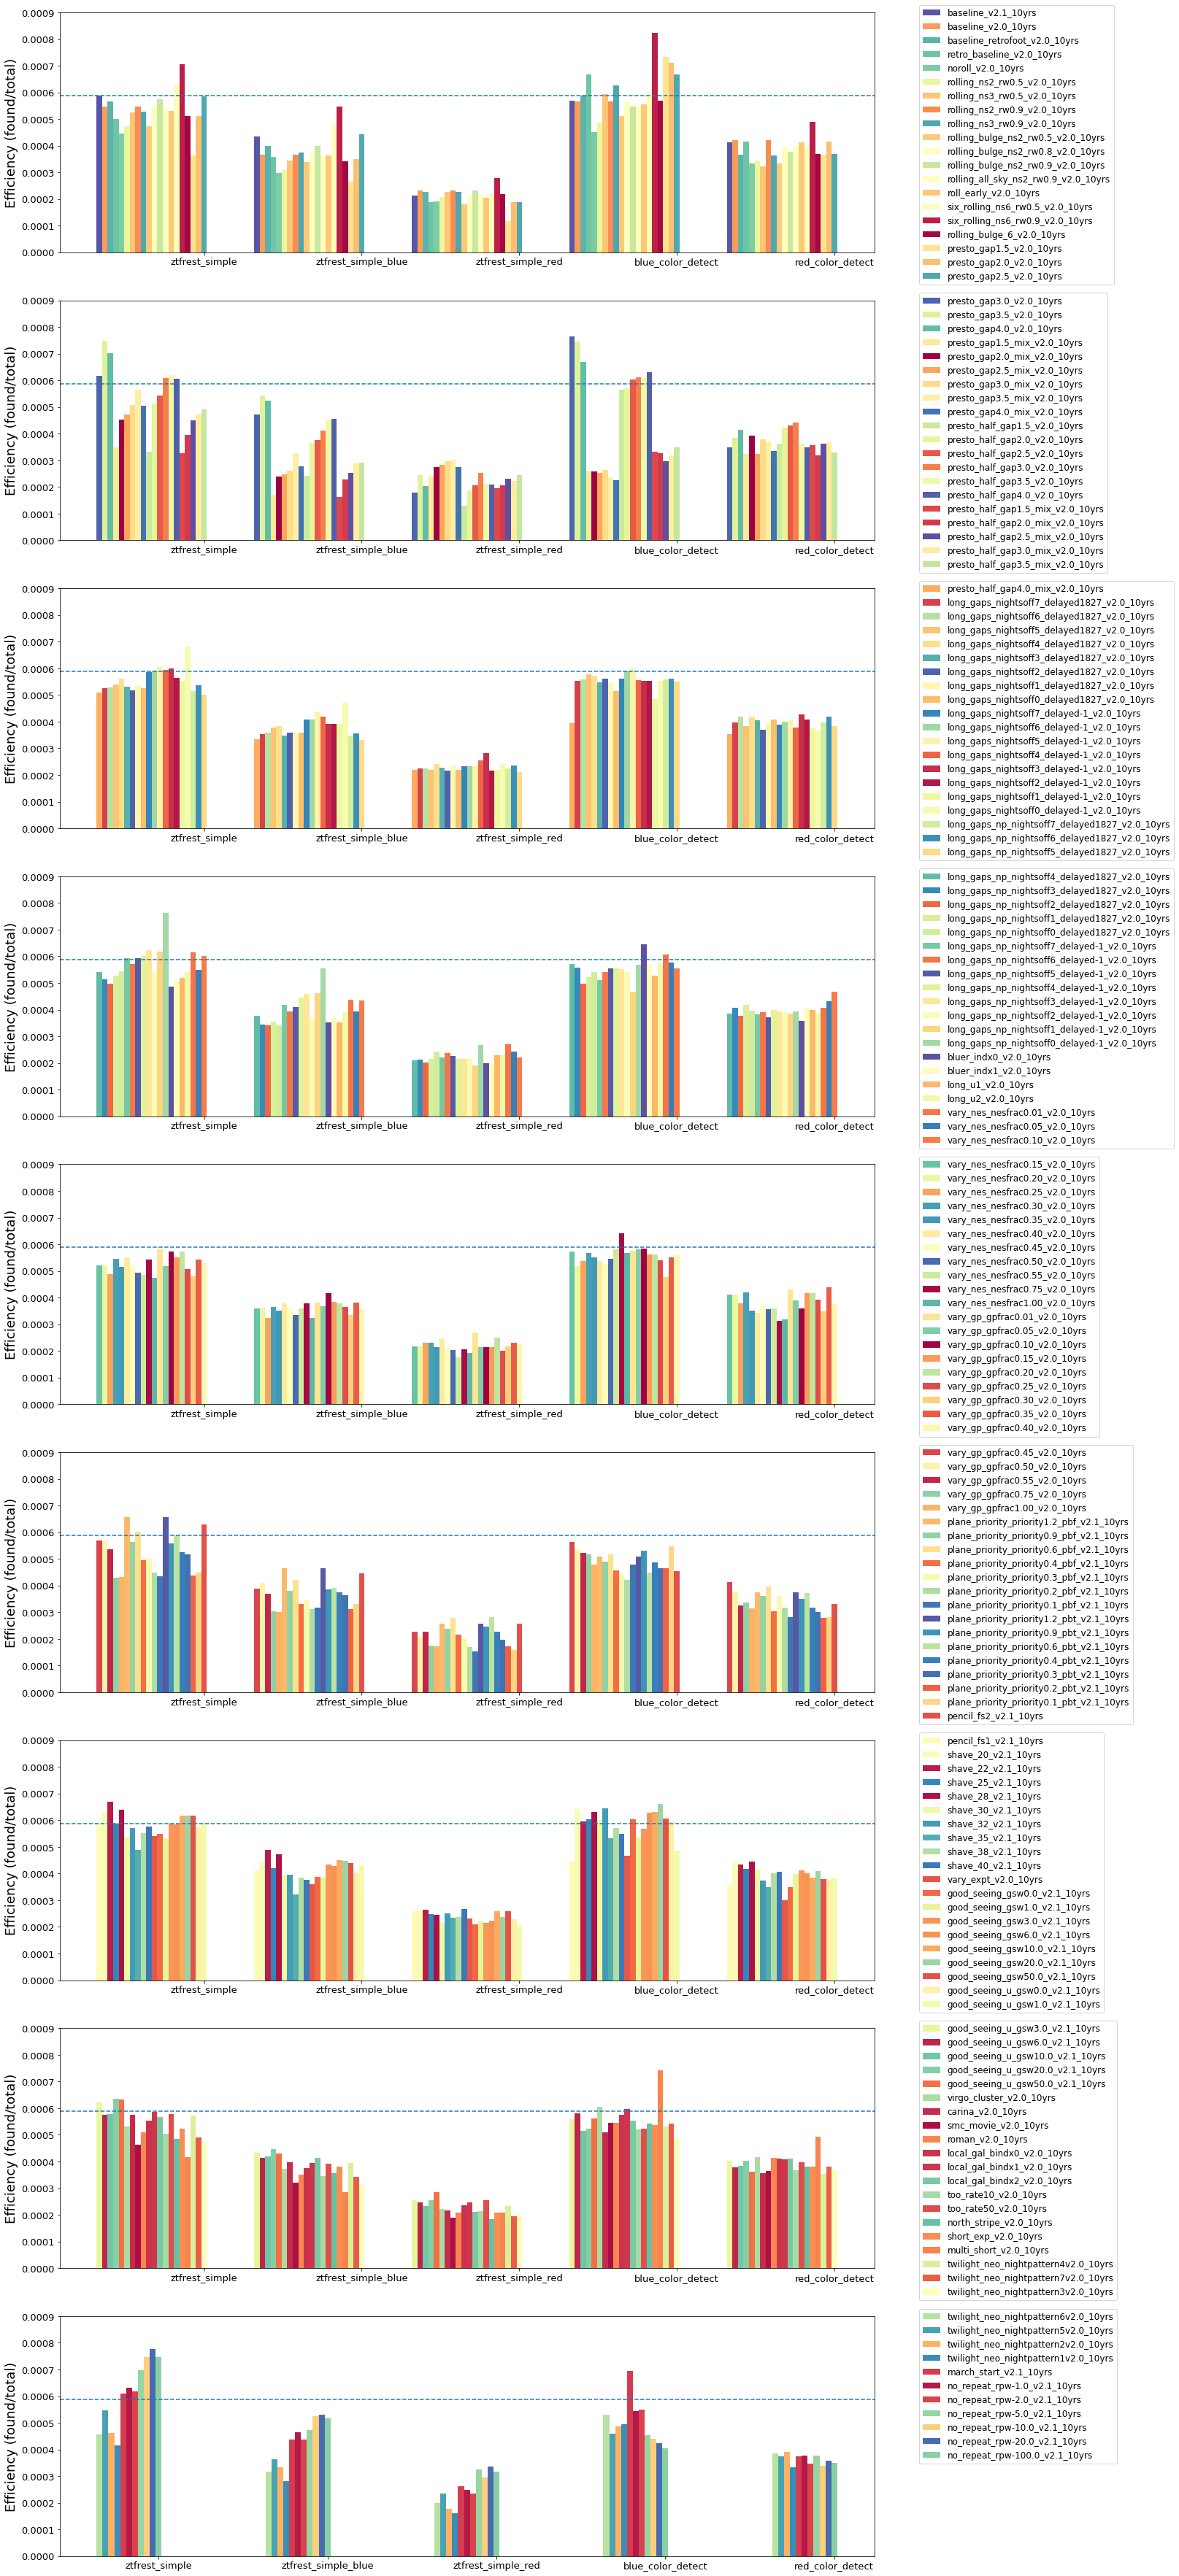

In [19]:
numruns = 171 # multiples of 20

model_colors = cm.Spectral(np.linspace(0, 1, numruns))#[::-1]
np.take(model_colors,np.random.permutation(model_colors.shape[0]),axis=0,out=model_colors);

fig, axes = plt.subplots(int(1*numruns/20)+1,1, figsize=(20,7.5*numruns/20))


bar_container = [None]*numruns

for item in range(numruns):
    bar_container[item] = [result_bar['ztfrest_simple'][item], 
                        result_bar['ztfrest_simple_blue'][item], 
                        result_bar['ztfrest_simple_red'][item], 
#                         result_bar['multi_detect'][item], 
                        result_bar['blue_color_detect'][item], 
#                         result_bar['multi_color_detect'][item], 
                        result_bar['red_color_detect'][item]]
    
metric_bars = np.arange(5)
width = 0.035

# plot data in grouped manner of bar type
for item in range(numruns):
    axes[int(item/20)].bar(metric_bars+width*item, bar_container[item], width, color=model_colors[item], tick_label=['ztfrest_simple', 
               'ztfrest_simple_blue', 
               'ztfrest_simple_red', 
#                'multi_detect',
               'blue_color_detect', 
#                'multi_color_detect', 
               'red_color_detect'])
    
for pos in range(1+int(numruns/20)):
#     axes[pos].set_xlabel('Metrics')
    axes[pos].set_ylabel('Efficiency (found/total)', fontsize=18)
    axes[pos].set_ylim([0, 0.0009])#0.005])
    axes[pos].legend(result_bar['run'][20*pos:20*pos+20].values, bbox_to_anchor=(1.05, 1.05), fontsize=12)
    axes[pos].axhline(y=result_bar['ztfrest_simple'][0], linestyle = '--')
    axes[pos].tick_params(axis='x', labelsize=13)
    axes[pos].tick_params(axis='y', labelsize=13)

plt.show()


# result_bar.columns

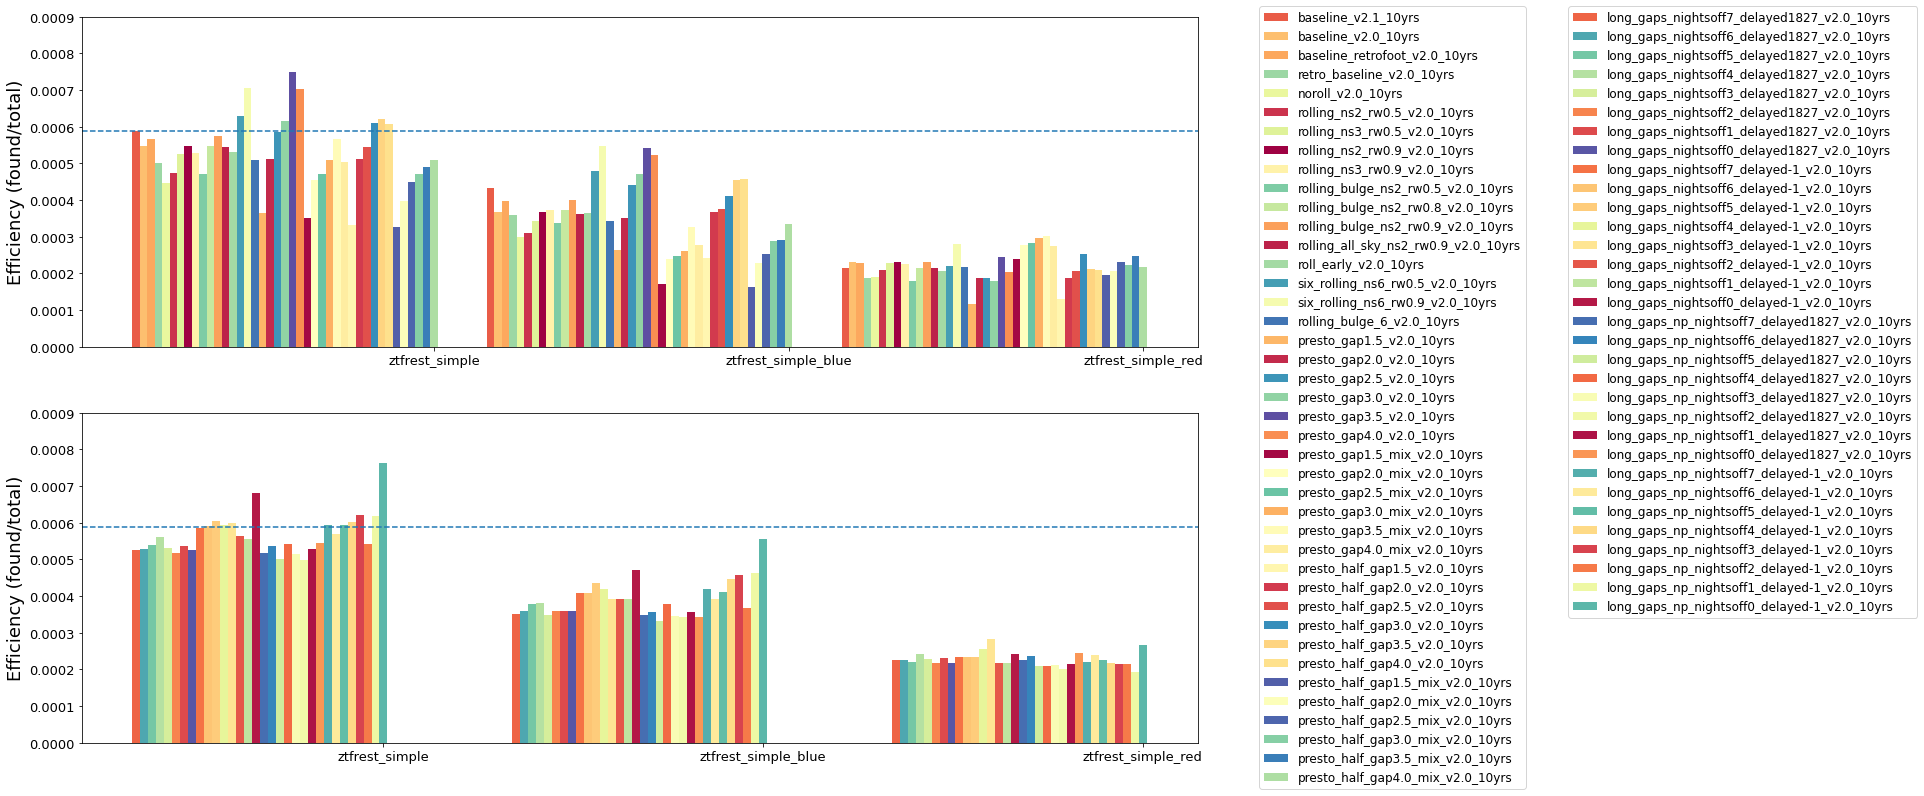

In [20]:
numruns = 73 # multiples of mult

mult = 41

model_colors = cm.Spectral(np.linspace(0, 1, numruns))#[::-1]
np.take(model_colors,np.random.permutation(model_colors.shape[0]),axis=0,out=model_colors);

fig, axes = plt.subplots(int(1*numruns/mult)+1,1, figsize=(20,7.5*numruns/mult))


bar_container = [None]*numruns

for item in range(numruns):
    bar_container[item] = [result_bar['ztfrest_simple'][item], 
                        result_bar['ztfrest_simple_blue'][item], 
                        result_bar['ztfrest_simple_red'][item]]#, 
# #                         result_bar['multi_detect'][item], 
#                         result_bar['blue_color_detect'][item], 
# #                         result_bar['multi_color_detect'][item], 
#                         result_bar['red_color_detect'][item]]
    
metric_bars = np.arange(3)#5)
width = 0.021

# plot data in grouped manner of bar type
for item in range(numruns):
    axes[int(item/mult)].bar(metric_bars+width*item, bar_container[item], width, color=model_colors[item], tick_label=['ztfrest_simple', 
               'ztfrest_simple_blue', 
               'ztfrest_simple_red'])#, 
# #                'multi_detect',
#                'blue_color_detect', 
# #                'multi_color_detect', 
#                'red_color_detect'])
    
for pos in range(1+int(numruns/mult)):
#     axes[pos].set_xlabel('Metrics')
    axes[pos].set_ylabel('Efficiency (found/total)', fontsize=18)
    axes[pos].set_ylim([0, 0.0009])#0.005])
    axes[pos].legend(result_bar['run'][mult*pos:mult*pos+mult].values, bbox_to_anchor=(1.05+pos*0.6, 1.05+1.2*pos), fontsize=12)
    axes[pos].axhline(y=result_bar['ztfrest_simple'][0], linestyle = '--')
    axes[pos].tick_params(axis='x', labelsize=13)
    axes[pos].tick_params(axis='y', labelsize=13)

plt.show()


# result_bar.columns

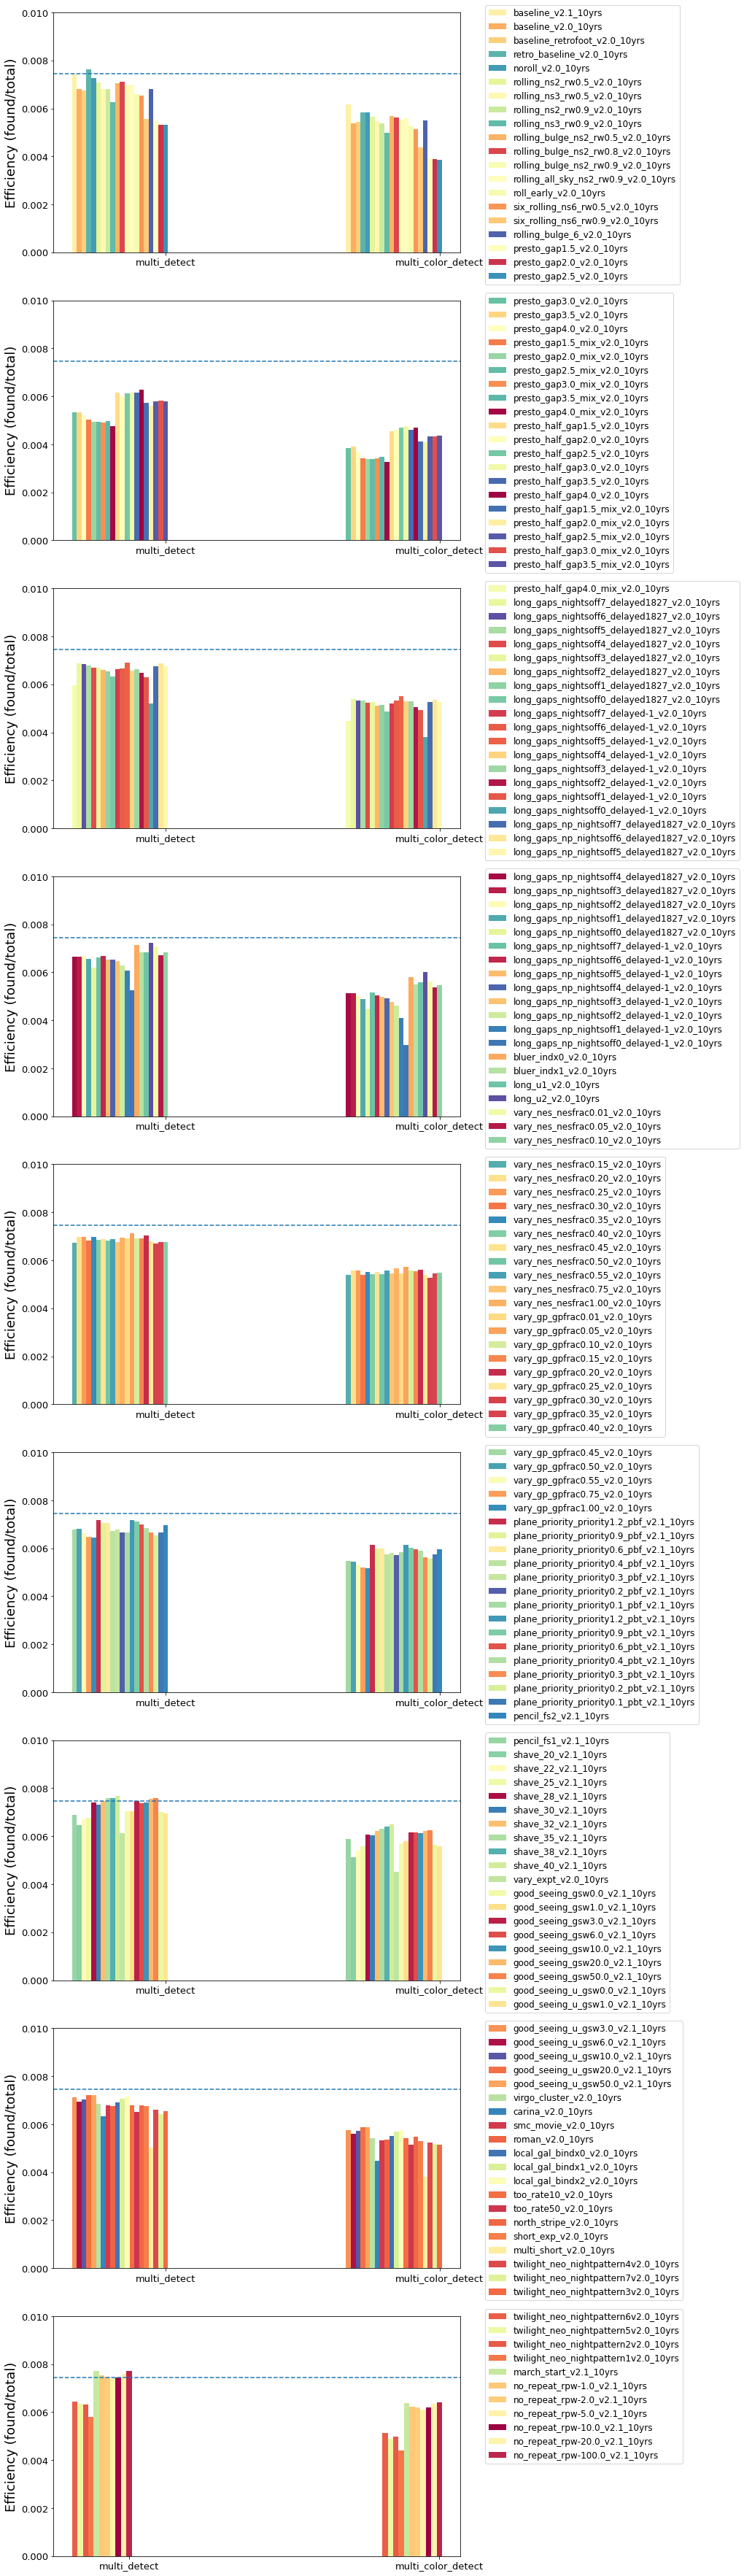

In [21]:
numruns = 171 # multiples of 20

model_colors = cm.Spectral(np.linspace(0, 1, numruns))#[::-1]
np.take(model_colors,np.random.permutation(model_colors.shape[0]),axis=0,out=model_colors);

fig, axes = plt.subplots(int(1*numruns/20)+1,1, figsize=(10,7.5*numruns/20))


bar_container = [None]*numruns

for item in range(numruns):
    bar_container[item] = [result_bar['multi_detect'][item], 
                        result_bar['multi_color_detect'][item]]
    
metric_bars = np.arange(2)
width = 0.035

# plot data in grouped manner of bar type
for item in range(numruns):
    axes[int(item/20)].bar(metric_bars+width/2*item, bar_container[item], width/2, color=model_colors[item], tick_label=['multi_detect','multi_color_detect'])
    
for pos in range(1+int(numruns/20)):
#     axes[pos].set_xlabel('Metrics')
    axes[pos].set_ylabel('Efficiency (found/total)', fontsize=18)
    axes[pos].set_ylim([0, 0.01])#0.03])
    axes[pos].legend(result_bar['run'][20*pos:20*pos+20].values, bbox_to_anchor=(1.05, 1.05), fontsize=12)
    axes[pos].axhline(y=result_bar['multi_detect'][0], linestyle = '--')
    axes[pos].tick_params(axis='x', labelsize=13)
    axes[pos].tick_params(axis='y', labelsize=13)

plt.show()

# result_bar.columns

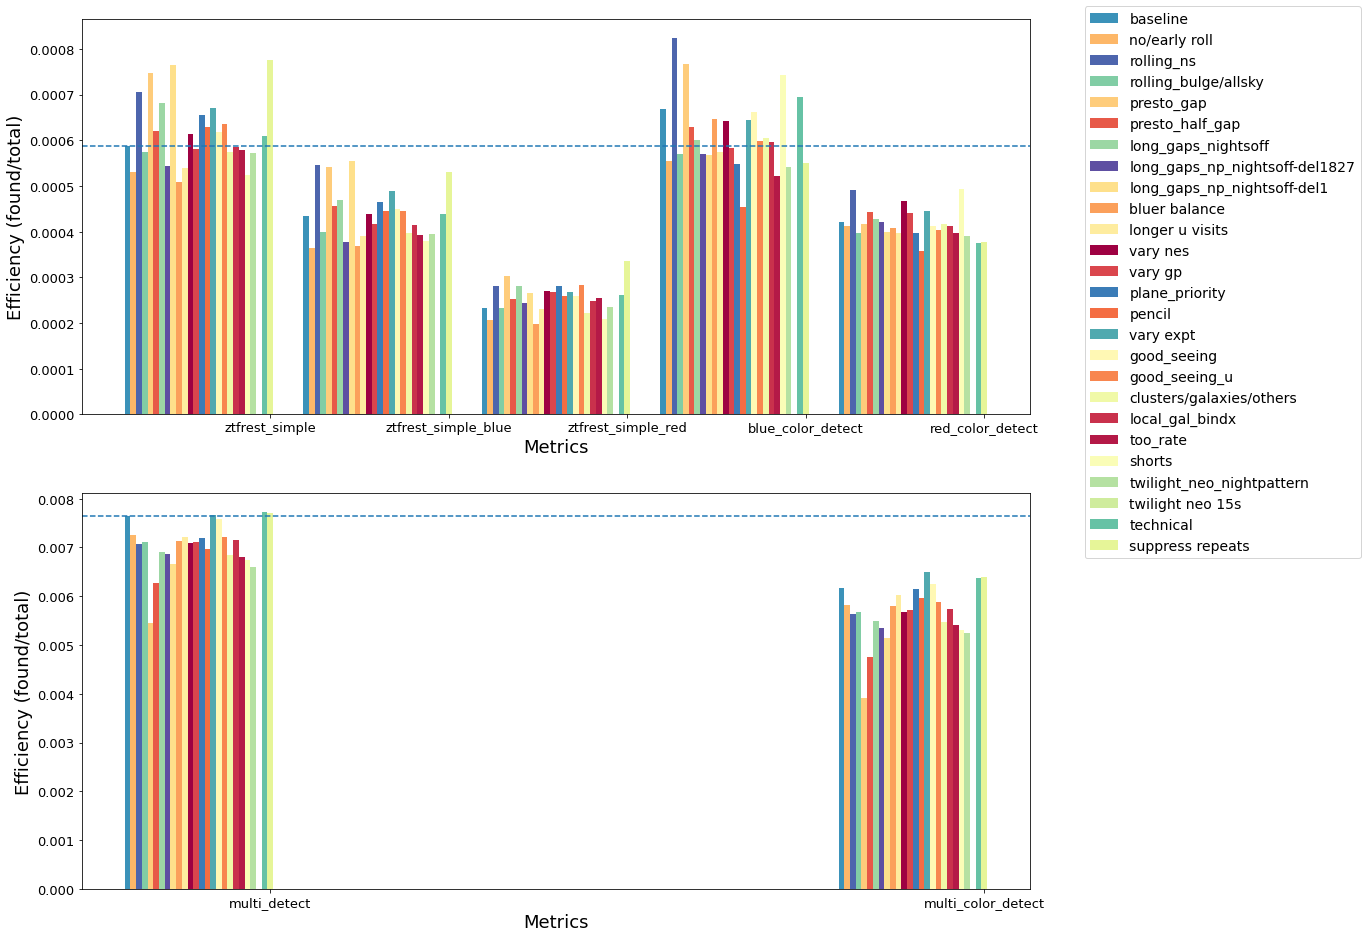

In [22]:
fig, axes = plt.subplots(2,1, figsize=(17,8*2))

numsubfam = 26

model_colors = cm.Spectral(np.linspace(0, 1, numsubfam))#[::-1]
np.take(model_colors,np.random.permutation(model_colors.shape[0]),axis=0,out=model_colors);

bar_container = [None]*numsubfam
bar_container2 = [None]*numsubfam

for item in range(numsubfam):
    bar_container[item] = [BestCadences['ztfrest_simple'][item], 
                        BestCadences['ztfrest_simple_blue'][item], 
                        BestCadences['ztfrest_simple_red'][item], 
                        BestCadences['blue_color_detect'][item], 
                        BestCadences['red_color_detect'][item]]
    bar_container2[item] = [BestCadences['multi_detect'][item], BestCadences['multi_color_detect'][item]]
    
metric_bars = np.arange(5)
metric_bars2 = np.arange(2)
width = 0.032

# plot data in grouped manner of bar type
for  item in range(numsubfam):
    axes[0].bar(metric_bars+width*item, bar_container[item], width, color=model_colors[item], tick_label=['ztfrest_simple', 
               'ztfrest_simple_blue', 
               'ztfrest_simple_red', 
               'blue_color_detect', 
               'red_color_detect'])
    axes[1].bar(metric_bars2+width/4*item, bar_container2[item], width/4, color=model_colors[item], tick_label=['multi_detect', 'multi_color_detect']) 

axes[0].set_xlabel('Metrics', fontsize=18)
axes[0].set_ylabel('Efficiency (found/total)', fontsize=18)
axes[0].legend(BestCadences['subfamily'][0:numsubfam].values, bbox_to_anchor=(1.05, 1.05), fontsize=14)
axes[0].tick_params(axis='x', labelsize=13)
axes[0].tick_params(axis='y', labelsize=13)

axes[1].set_xlabel('Metrics', fontsize=18)
axes[1].set_ylabel('Efficiency (found/total)', fontsize=18)
axes[1].tick_params(axis='x', labelsize=13)
axes[1].tick_params(axis='y', labelsize=13)

axes[0].axhline(y=BestCadences['ztfrest_simple'][0], linestyle = '--')
axes[1].axhline(y=BestCadences['multi_detect'][0], linestyle = '--')


plt.show()


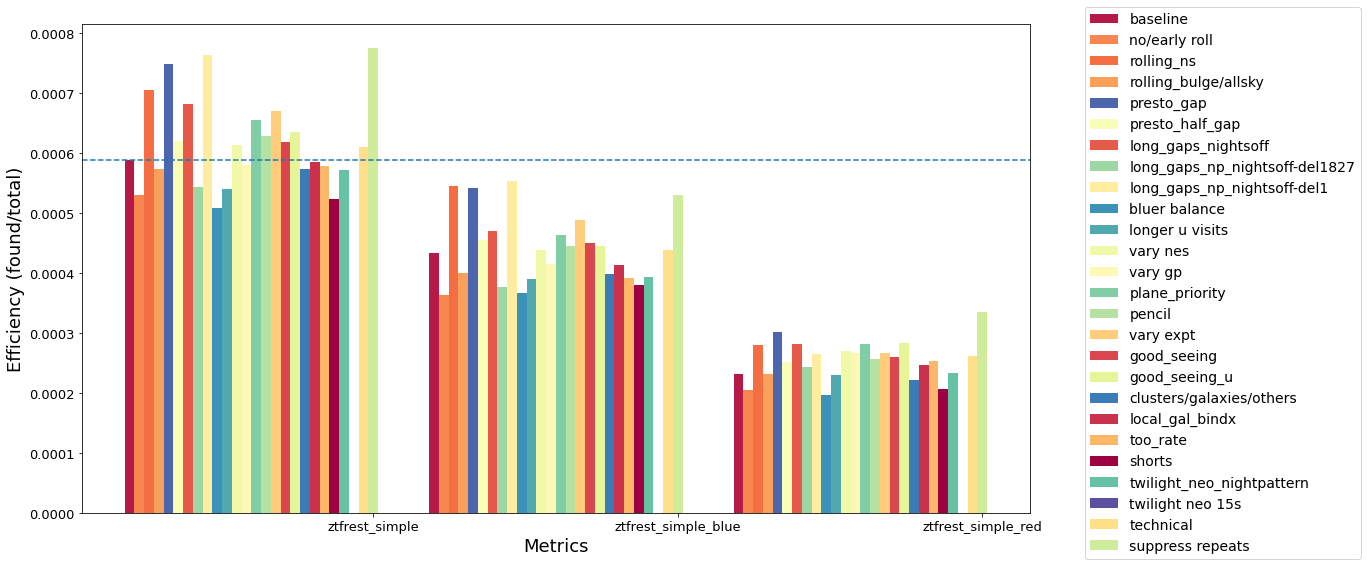

In [23]:
fig, axes = plt.subplots(1,1, figsize=(17,9))

numsubfam = 26

model_colors = cm.Spectral(np.linspace(0, 1, numsubfam))#[::-1]
np.take(model_colors,np.random.permutation(model_colors.shape[0]),axis=0,out=model_colors);

bar_container = [None]*numsubfam
# bar_container2 = [None]*numsubfam

for item in range(numsubfam):
    bar_container[item] = [BestCadences['ztfrest_simple'][item], 
                        BestCadences['ztfrest_simple_blue'][item], 
                        BestCadences['ztfrest_simple_red'][item]]#, 
#                         BestCadences['blue_color_detect'][item], 
#                         BestCadences['red_color_detect'][item]]
#     bar_container2[item] = [BestCadences['multi_detect'][item], BestCadences['multi_color_detect'][item]]
    
metric_bars = np.arange(3)#5)
# metric_bars2 = np.arange(2)
width = 0.032

# plot data in grouped manner of bar type
for  item in range(numsubfam):
    axes.bar(metric_bars+width*item, bar_container[item], width, color=model_colors[item], tick_label=['ztfrest_simple', 
               'ztfrest_simple_blue', 
               'ztfrest_simple_red'])#, 
#                'blue_color_detect', 
#                'red_color_detect'])
#     axes[1].bar(metric_bars2+width/4*item, bar_container2[item], width/4, color=model_colors[item], tick_label=['multi_detect', 'multi_color_detect']) 

axes.set_xlabel('Metrics', fontsize=18)
axes.set_ylabel('Efficiency (found/total)', fontsize=18)
axes.legend(BestCadences['subfamily'][0:numsubfam].values, bbox_to_anchor=(1.05, 1.05), fontsize=14)
axes.tick_params(axis='x', labelsize=13)
axes.tick_params(axis='y', labelsize=13)

# axes[1].set_xlabel('Metrics', fontsize=18)
# axes[1].set_ylabel('Efficiency (found/total)', fontsize=18)
# axes[1].tick_params(axis='x', labelsize=13)
# axes[1].tick_params(axis='y', labelsize=13)

axes.axhline(y=BestCadences['ztfrest_simple'][0], linestyle = '--')
# axes[1].axhline(y=BestCadences['multi_detect'][0], linestyle = '--')


plt.show()


In [24]:
result_bar[:214]

run  \
family                                                                     
baseline                                             baseline_v2.1_10yrs   
baseline                                             baseline_v2.0_10yrs   
baseline                                   baseline_retrofoot_v2.0_10yrs   
baseline                                       retro_baseline_v2.0_10yrs   
rolling                                                noroll_v2.0_10yrs   
rolling                                     rolling_ns2_rw0.5_v2.0_10yrs   
rolling                                     rolling_ns3_rw0.5_v2.0_10yrs   
rolling                                     rolling_ns2_rw0.9_v2.0_10yrs   
rolling                                     rolling_ns3_rw0.9_v2.0_10yrs   
rolling                               rolling_bulge_ns2_rw0.5_v2.0_10yrs   
rolling                               rolling_bulge_ns2_rw0.8_v2.0_10yrs   
rolling                               rolling_bulge_ns2_rw0.9_v2.0_10yrs   
rolling                             rolling_all_sky_ns2_rw0.9_v2.0_10yrs   
rolling                                            roll_early_v2.0_10yrs   
rolling                                 six_rolling_ns6_rw0.5_v2.0_10yrs   
rolling                                 six_rolling_ns6_rw0.9_v2.0_10yrs   
rolling                                       rolling_bulge_6_v2.0_10yrs   
triplets                                        presto_gap1.5_v2.0_10yrs   
triplets                                        presto_gap2.0_v2.0_10yrs   
triplets                                        presto_gap2.5_v2.0_10yrs   
triplets                                        presto_gap3.0_v2.0_10yrs   
triplets                                        presto_gap3.5_v2.0_10yrs   
triplets                                        presto_gap4.0_v2.0_10yrs   
triplets                                    presto_gap1.5_mix_v2.0_10yrs   
triplets                                    presto_gap2.0_mix_v2.0_10yrs   
triplets                                    presto_gap2.5_mix_v2.0_10yrs   
triplets                                    presto_gap3.0_mix_v2.0_10yrs   
triplets                                    presto_gap3.5_mix_v2.0_10yrs   
triplets                                    presto_gap4.0_mix_v2.0_10yrs   
triplets                                   presto_half_gap1.5_v2.0_10yrs   
triplets                                   presto_half_gap2.0_v2.0_10yrs   
triplets                                   presto_half_gap2.5_v2.0_10yrs   
triplets                                   presto_half_gap3.0_v2.0_10yrs   
triplets                                   presto_half_gap3.5_v2.0_10yrs   
triplets                                   presto_half_gap4.0_v2.0_10yrs   
triplets                               presto_half_gap1.5_mix_v2.0_10yrs   
triplets                               presto_half_gap2.0_mix_v2.0_10yrs   
triplets                               presto_half_gap2.5_mix_v2.0_10yrs   
triplets                               presto_half_gap3.0_mix_v2.0_10yrs   
triplets                               presto_half_gap3.5_mix_v2.0_10yrs   
triplets                               presto_half_gap4.0_mix_v2.0_10yrs   
triplets                     long_gaps_nightsoff7_delayed1827_v2.0_10yrs   
triplets                     long_gaps_nightsoff6_delayed1827_v2.0_10yrs   
triplets                     long_gaps_nightsoff5_delayed1827_v2.0_10yrs   
triplets                     long_gaps_nightsoff4_delayed1827_v2.0_10yrs   
triplets                     long_gaps_nightsoff3_delayed1827_v2.0_10yrs   
triplets                     long_gaps_nightsoff2_delayed1827_v2.0_10yrs   
triplets                     long_gaps_nightsoff1_delayed1827_v2.0_10yrs   
triplets                     long_gaps_nightsoff0_delayed1827_v2.0_10yrs   
triplets                       long_gaps_nightsoff7_delayed-1_v2.0_10yrs   
triplets                       long_gaps_nightsoff6_delayed-1_v2.0_10yrs   
triplets                       long_gaps_

In [25]:
# model_colors = cm.Spectral(np.linspace(0, 1, len(models)))[::-1]

In [26]:
# help(cm.Spectral)
cm.Spectral(np.linspace(0, 1, len([1,2,3,4,5])))[::-1]

array([[0.36862745, 0.30980392, 0.63529412, 1.        ],
       [0.52733564, 0.8106113 , 0.64521338, 1.        ],
       [0.99807766, 0.99923106, 0.74602076, 1.        ],
       [0.97485582, 0.557401  , 0.32272203, 1.        ],
       [0.61960784, 0.00392157, 0.25882353, 1.        ]])

In [27]:
# model_colors = cm.Spectral(np.linspace(0, 1, len([1,2,3,4,5])))

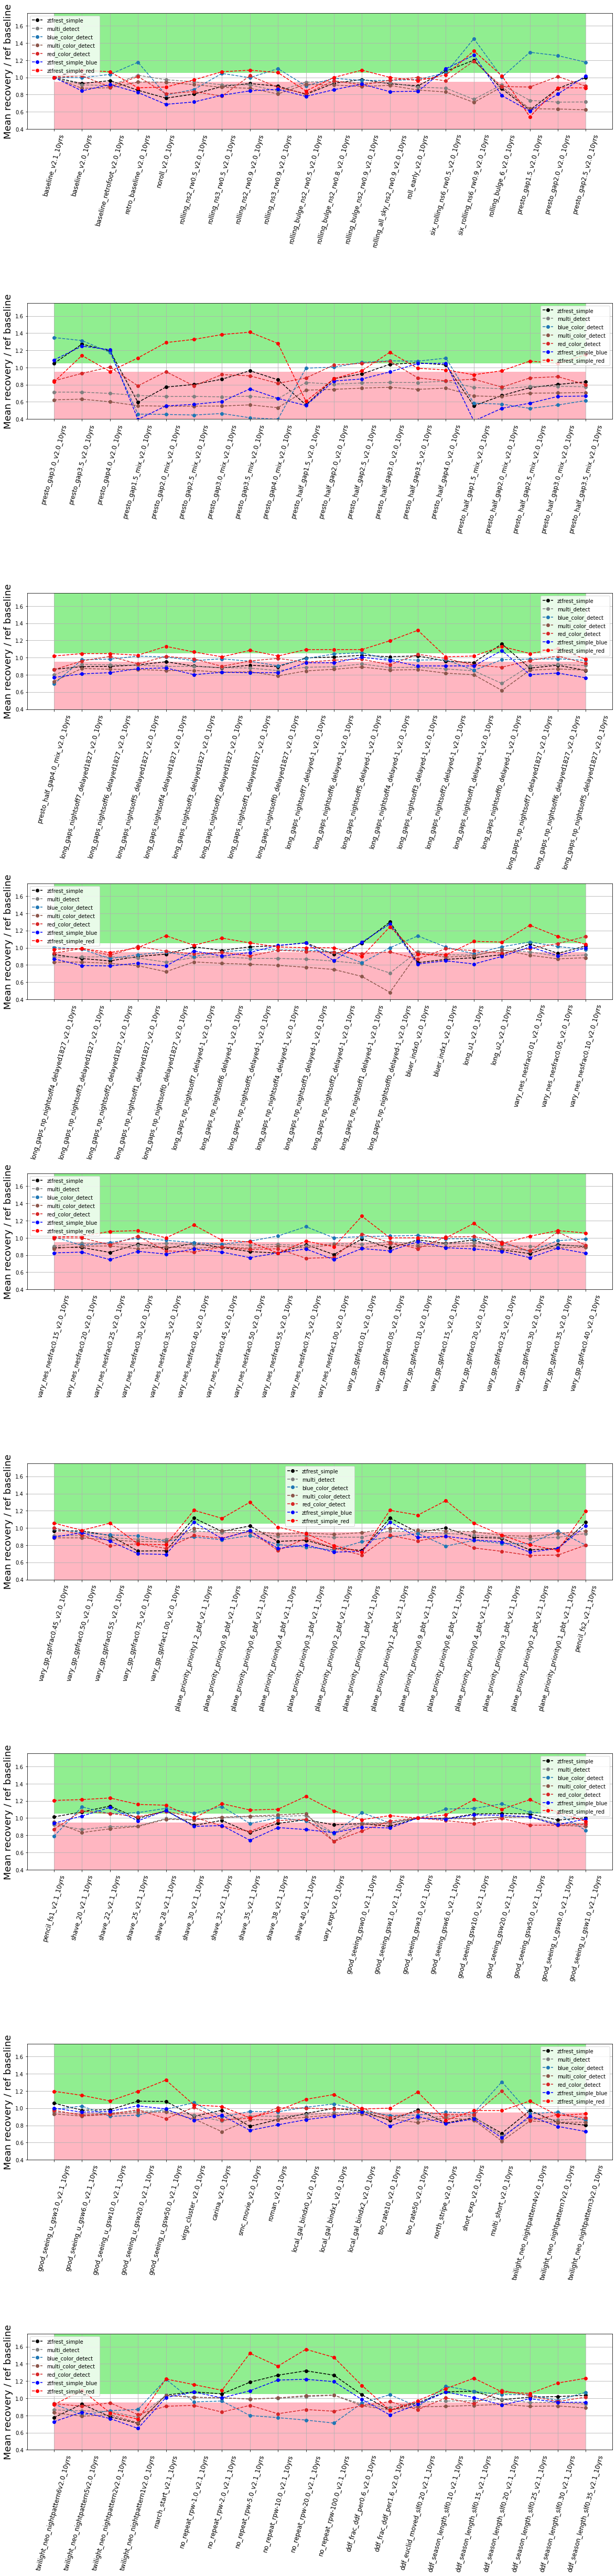

In [28]:
numruns = 171 
groupsof = 20

fig, axes = plt.subplots(int(1*numruns/groupsof)+1,1, figsize=(20,10*numruns/groupsof))

f = 165
l = 171

# f = 50
# l = 171
for item in range(int(1*numruns/groupsof)+1):
    f=item*groupsof
    l=item*groupsof+groupsof
    family = result_bar.index[f:l].values
    subfamily = result_bar['subfamily'][f:l].values
    cadence = result_bar['run'][f:l].values
    option = result_bar['option'][f:l].values
    metric0 = result_bar['ztfrest_simple'][f:l].values 
    metric1 = result_bar['multi_detect'][f:l].values
    metric2 = result_bar['blue_color_detect'][f:l].values
    metric3 = result_bar['multi_color_detect'][f:l].values
    metric4 = result_bar['red_color_detect'][f:l].values
    metric5 = result_bar['ztfrest_simple_blue'][f:l].values
    metric6 = result_bar['ztfrest_simple_red'][f:l].values


    axes[item].plot(cadence,metric0 / refcadence[refcadence[' metric']==' KNePopMetric__ztfrest_simple'][' efficiency'].values[0], linestyle = 'dashed', color='k', marker='o')
    axes[item].plot(cadence,metric1 / refcadence[refcadence[' metric']==' KNePopMetric__multi_detect'][' efficiency'].values[0], linestyle = 'dashed', color='grey', marker='o')
    axes[item].plot(cadence,metric2 / refcadence[refcadence[' metric']==' KNePopMetric__blue_color_detect'][' efficiency'].values[0], linestyle = 'dashed', color='tab:blue', marker='o')
    axes[item].plot(cadence,metric3 / refcadence[refcadence[' metric']==' KNePopMetric__multi_color_detect'][' efficiency'].values[0], linestyle = 'dashed', color='tab:brown', marker='o')
    axes[item].plot(cadence,metric4 / refcadence[refcadence[' metric']==' KNePopMetric__red_color_detect'][' efficiency'].values[0], linestyle = 'dashed', color='tab:red', marker='o')
    axes[item].plot(cadence,metric5 / refcadence[refcadence[' metric']==' KNePopMetric__ztfrest_simple_blue'][' efficiency'].values[0], linestyle = 'dashed', color='b', marker='o')
    axes[item].plot(cadence,metric6 / refcadence[refcadence[' metric']==' KNePopMetric__ztfrest_simple_red'][' efficiency'].values[0], linestyle = 'dashed', color='r', marker='o')

    for tick in axes[item].get_xticklabels():
        tick.set_rotation(75)
        tick.set_fontsize(12)

    axes[item].grid()
    axes[item].set_ylim([0.4,1.75])
    axes[item].set_ylabel('Mean recovery / ref baseline', fontsize=18)
    axes[item].legend(['ztfrest_simple', 'multi_detect', 'blue_color_detect', 'multi_color_detect','red_color_detect', 'ztfrest_simple_blue', 'ztfrest_simple_red'])

    axes[item].fill_between(cadence, 1.05, 2,  facecolor='lightgreen')
    axes[item].fill_between(cadence, 0.95, 0,  facecolor='lightpink')
    
fig.subplots_adjust(hspace=1.5)
plt.show()


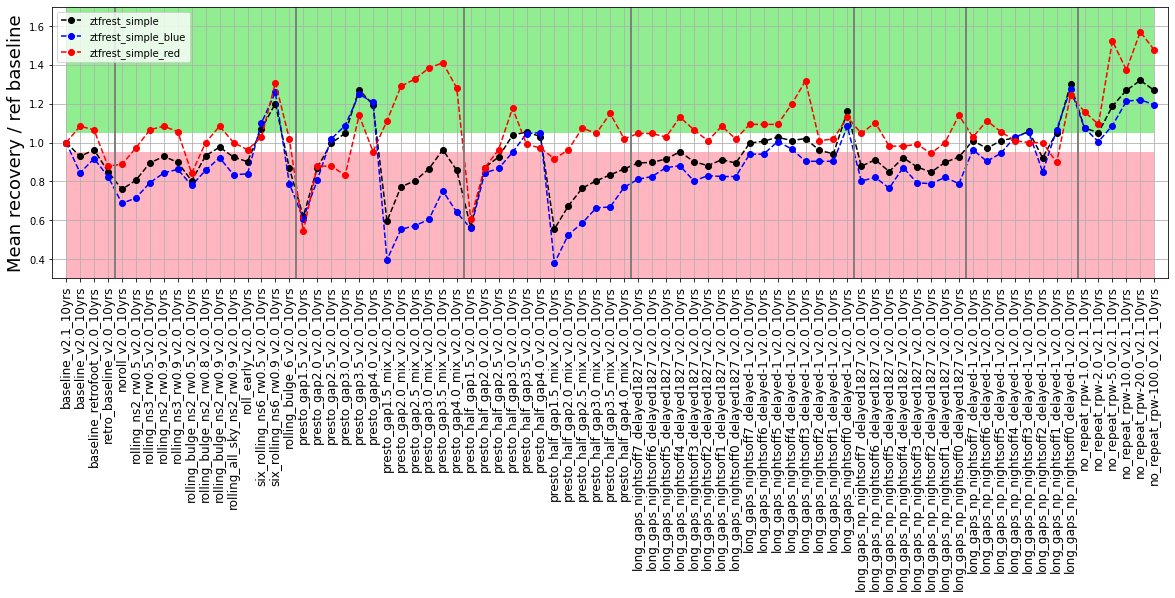

In [29]:
numruns = 73
groupsof = 73

fig, axes = plt.subplots(1,1, figsize=(20,5))#*numruns/groupsof))

# f = 165
# l = 171

# # f = 50
# # l = 171
# for item in range(int(1*numruns/groupsof)+1):
f=0#item*groupsof
l=numruns#item*groupsof+groupsof
family = result_bar.index[f:l].values
family = np.concatenate((family,result_bar.index[165:171].values), axis=0)
subfamily = result_bar['subfamily'][f:l].values
subfamily = np.concatenate((subfamily,result_bar['subfamily'][165:171].values), axis=0)
cadence = result_bar['run'][f:l].values
cadence = np.concatenate((cadence,result_bar['run'][165:171].values), axis=0)
option = result_bar['option'][f:l].values
option = np.concatenate((option,result_bar['option'][165:171].values), axis=0)
metric0 = result_bar['ztfrest_simple'][f:l].values
metric0 = np.concatenate((metric0,result_bar['ztfrest_simple'][165:171].values), axis=0)
#     metric1 = result_bar['multi_detect'][f:l].values
#     metric2 = result_bar['blue_color_detect'][f:l].values
#     metric3 = result_bar['multi_color_detect'][f:l].values
#     metric4 = result_bar['red_color_detect'][f:l].values
metric5 = result_bar['ztfrest_simple_blue'][f:l].values
metric5 = np.concatenate((metric5,result_bar['ztfrest_simple_blue'][165:171].values), axis=0)
metric6 = result_bar['ztfrest_simple_red'][f:l].values
metric6 = np.concatenate((metric6,result_bar['ztfrest_simple_red'][165:171].values), axis=0)

axes.plot(cadence,metric0 / refcadence[refcadence[' metric']==' KNePopMetric__ztfrest_simple'][' efficiency'].values[0], linestyle = 'dashed', color='k', marker='o')
#     axes[item].plot(cadence,metric1 / refcadence[refcadence[' metric']==' KNePopMetric__multi_detect'][' efficiency'].values[0], linestyle = 'dashed', color='grey', marker='o')
#     axes[item].plot(cadence,metric2 / refcadence[refcadence[' metric']==' KNePopMetric__blue_color_detect'][' efficiency'].values[0], linestyle = 'dashed', color='tab:blue', marker='o')
#     axes[item].plot(cadence,metric3 / refcadence[refcadence[' metric']==' KNePopMetric__multi_color_detect'][' efficiency'].values[0], linestyle = 'dashed', color='tab:brown', marker='o')
#     axes[item].plot(cadence,metric4 / refcadence[refcadence[' metric']==' KNePopMetric__red_color_detect'][' efficiency'].values[0], linestyle = 'dashed', color='tab:red', marker='o')
axes.plot(cadence,metric5 / refcadence[refcadence[' metric']==' KNePopMetric__ztfrest_simple_blue'][' efficiency'].values[0], linestyle = 'dashed', color='b', marker='o')
axes.plot(cadence,metric6 / refcadence[refcadence[' metric']==' KNePopMetric__ztfrest_simple_red'][' efficiency'].values[0], linestyle = 'dashed', color='r', marker='o')

for tick in axes.get_xticklabels():
    tick.set_rotation(90)#75)
    tick.set_fontsize(12)

axes.grid()
axes.set_ylim([0.3,1.7])
axes.set_xlim([-1,79])
axes.set_ylabel('Mean recovery / ref baseline', fontsize=18)
axes.legend(['ztfrest_simple', 'ztfrest_simple_blue', 'ztfrest_simple_red'])

axes.fill_between(cadence, 1.05, 2,  facecolor='lightgreen')
axes.fill_between(cadence, 0.95, 0,  facecolor='lightpink')
    
# fig.subplots_adjust(hspace=1.5)

colrsp = 'gray'
linewth = 2
axes.axvline(x=4-0.5, linestyle = '-', c=colrsp, linewidth=linewth)
axes.axvline(x=17-0.5, linestyle = '-', c=colrsp, linewidth=linewth)
axes.axvline(x=29-0.5, linestyle = '-', c=colrsp, linewidth=linewth)
axes.axvline(x=41-0.5, linestyle = '-', c=colrsp, linewidth=linewth)
axes.axvline(x=57-0.5, linestyle = '-', c=colrsp, linewidth=linewth)
axes.axvline(x=65-0.5, linestyle = '-', c=colrsp, linewidth=linewth)
axes.axvline(x=73-0.5, linestyle = '-', c=colrsp, linewidth=linewth)


plt.show()


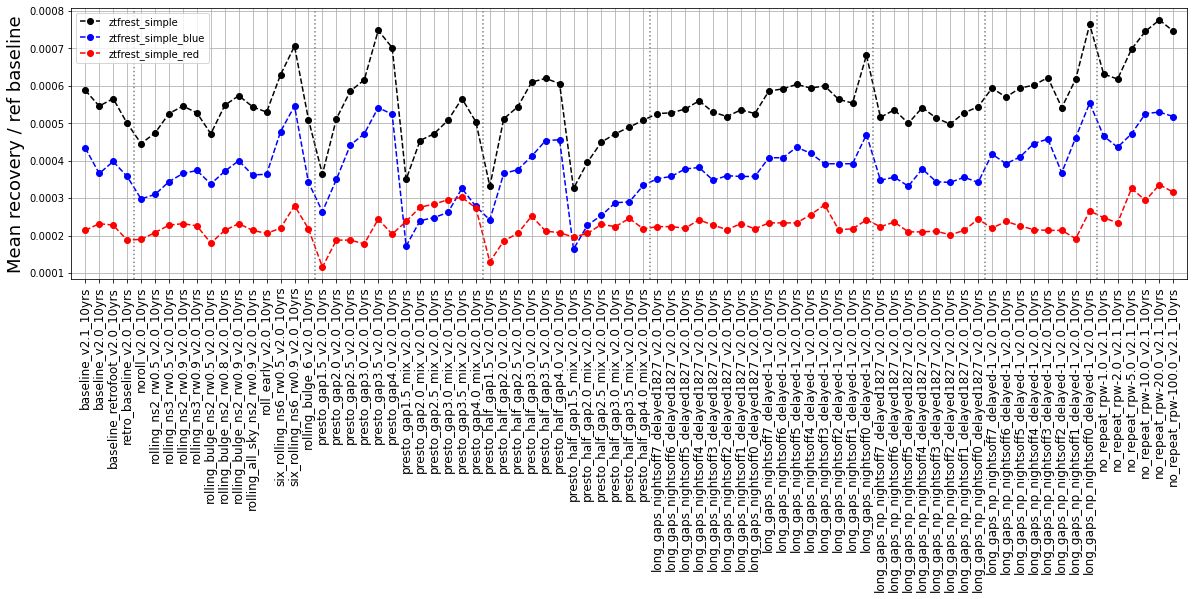

In [30]:
numruns = 73
groupsof = 73

fig, axes = plt.subplots(1,1, figsize=(20,5))#*numruns/groupsof))

# f = 165
# l = 171

# # f = 50
# # l = 171
# for item in range(int(1*numruns/groupsof)+1):
f=0#item*groupsof
l=numruns#item*groupsof+groupsof
family = result_bar.index[f:l].values
family = np.concatenate((family,result_bar.index[165:171].values), axis=0)
subfamily = result_bar['subfamily'][f:l].values
subfamily = np.concatenate((subfamily,result_bar['subfamily'][165:171].values), axis=0)
cadence = result_bar['run'][f:l].values
cadence = np.concatenate((cadence,result_bar['run'][165:171].values), axis=0)
option = result_bar['option'][f:l].values
option = np.concatenate((option,result_bar['option'][165:171].values), axis=0)
metric0 = result_bar['ztfrest_simple'][f:l].values
metric0 = np.concatenate((metric0,result_bar['ztfrest_simple'][165:171].values), axis=0)
#     metric1 = result_bar['multi_detect'][f:l].values
#     metric2 = result_bar['blue_color_detect'][f:l].values
#     metric3 = result_bar['multi_color_detect'][f:l].values
#     metric4 = result_bar['red_color_detect'][f:l].values
metric5 = result_bar['ztfrest_simple_blue'][f:l].values
metric5 = np.concatenate((metric5,result_bar['ztfrest_simple_blue'][165:171].values), axis=0)
metric6 = result_bar['ztfrest_simple_red'][f:l].values
metric6 = np.concatenate((metric6,result_bar['ztfrest_simple_red'][165:171].values), axis=0)

axes.plot(cadence,metric0, linestyle = 'dashed', color='k', marker='o')
#     axes[item].plot(cadence,metric1 / refcadence[refcadence[' metric']==' KNePopMetric__multi_detect'][' efficiency'].values[0], linestyle = 'dashed', color='grey', marker='o')
#     axes[item].plot(cadence,metric2 / refcadence[refcadence[' metric']==' KNePopMetric__blue_color_detect'][' efficiency'].values[0], linestyle = 'dashed', color='tab:blue', marker='o')
#     axes[item].plot(cadence,metric3 / refcadence[refcadence[' metric']==' KNePopMetric__multi_color_detect'][' efficiency'].values[0], linestyle = 'dashed', color='tab:brown', marker='o')
#     axes[item].plot(cadence,metric4 / refcadence[refcadence[' metric']==' KNePopMetric__red_color_detect'][' efficiency'].values[0], linestyle = 'dashed', color='tab:red', marker='o')
axes.plot(cadence,metric5, linestyle = 'dashed', color='b', marker='o')
axes.plot(cadence,metric6, linestyle = 'dashed', color='r', marker='o')

for tick in axes.get_xticklabels():
    tick.set_rotation(90)#75)
    tick.set_fontsize(12)

axes.grid()
# axes.set_ylim([0.4,1.75])
axes.set_xlim([-1,79])
axes.set_ylabel('Mean recovery / ref baseline', fontsize=18)
axes.legend(['ztfrest_simple', 'ztfrest_simple_blue', 'ztfrest_simple_red'])

# axes.fill_between(cadence, 1.05, 2,  facecolor='lightgreen')
# axes.fill_between(cadence, 0.95, 0,  facecolor='lightpink')
    
# fig.subplots_adjust(hspace=1.5)

colrsp = 'gray'
axes.axvline(x=4-0.5, linestyle = ':', c=colrsp)
axes.axvline(x=17-0.5, linestyle = ':', c=colrsp)
axes.axvline(x=29-0.5, linestyle = ':', c=colrsp)
axes.axvline(x=41-0.5, linestyle = ':', c=colrsp)
axes.axvline(x=57-0.5, linestyle = ':', c=colrsp)
axes.axvline(x=65-0.5, linestyle = ':', c=colrsp)
axes.axvline(x=73-0.5, linestyle = ':', c=colrsp)


plt.show()
